In [1]:
import os 
for i in range(1,5):
    # /home/hnguyen/doc/multi_branch_2D/data/data_isbi_2015/training/training01/preprocessed
    path = f'/home/hnguyen/doc/multi_branch_2D/data/data_isbi_2015/training/training0{i}/preprocessed'
    list_dir =  os.listdir(path)
    print('len dir = ', len(list_dir))

FileNotFoundError: [Errno 2] No such file or directory: '/home/hnguyen/doc/multi_branch_2D/data/data_isbi_2015/training/training01/preprocessed'

In [8]:
path_0 = '/home/hnguyen/doc/multi_branch_2D/data/sample_dataset/train/0.pkl'
path_1 = '/home/hnguyen/doc/multi_branch_2D/data/sample_dataset/train/1.pkl'
import pickle
# read pkl file 
img_0 = pickle.load(open(path_0, 'rb'))
img_1 = pickle.load(open(path_1, 'rb'))

# img_0['t1'][:, :, 1] - img_1['t1'][:, :, 0]
img_1['t1'].shape


(217, 181, 3)

In [2]:
import os.path
import random
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch
import numpy as np
import torch.utils.data as data
from data.ms_2d_dataset import *
from dotmap import DotMap
root = '/home/hnguyen/doc/multi_branch_2D/data/sample_dataset'
opt = {'dataroot': root, 'phase': 'train', 'trainSize': 256, 'no_flip': False}
opt = DotMap(opt)
data_ms = MsDataset()
data_ms.initialize(opt)
len(data_ms)



ModuleNotFoundError: No module named 'data.ms_2d_dataset'

In [2]:
index_ms = 1000
# plot img 
import matplotlib.pyplot as plt
data_image = data_ms[index_ms]
# visualize medical xray image

from ipywidgets import ToggleButtons
from ipywidgets import interact, interactive, fixed, interact_manual
select_class = ToggleButtons(
    options = ['t1', 't2', 'flair', 'mask'],
    description = 'Select class:',
    disable = False,
    button_style = 'info', # 'success', 'info', 'warning', 'danger' or '')
)
from ipywidgets import IntSlider
select_layer = IntSlider(min = 0, max = 2, description = 'Select layer:')
def plot_image(select_class, select_layer):
    ''' 
    data_image: dict has key: t1, t2, flair, mask
    select_class: list of class ['t1', 't2', 'flair', 'mask']
    select_layer: int, select layer of image
    '''
    plt.figure(figsize = (20, 10))

    plt.imshow(data_image[select_class][select_layer])
    # draw blue color if have mask in gray image
    draw_mask  =  data_image['mask'][select_layer] > 0 
    plt.imshow(draw_mask, alpha = 0.7)
    plt.show()
    
interact(plot_image, select_class = select_class, select_layer = select_layer)

NameError: name 'data_ms' is not defined

In [6]:
# root_path = "/home/hnguyen/doc/multi_branch_2D/data/sample_dataset/train"
# train_2d_slice_path = "/home/hnguyen/doc/multi_branch_2D/data/sample_dataset/train_2d"
# import os
# import pickle
# pkl_list = os.listdir(root_path)

import os.path
import random
import torch
import numpy as np
import torch.utils.data as data
from main.ms_2d_dataset import *
from dotmap import DotMap
root = '/home/anhnx5/work/multi_branch_2d/data/sample_dataset'
opt = {'dataroot': root, 'phase': 'train', 'trainSize': 256, 'no_flip': False}
opt = DotMap(opt)
data_ms = MsDataset()
data_ms.initialize(opt)
len(data_ms)



8444

In [7]:
root_path = "/home/anhnx5/work/multi_branch_2d/data/sample_dataset/train"
train_2d_slice_processed_path = "/home/anhnx5/work/multi_branch_2d/data/sample_dataset/train_2d_processed"
import os
import pickle
pkl_list = os.listdir(root_path)

count_slice = 0
for data in data_ms: 
        image_t1 = data['t1']
        image_t2 = data['t2']
        image_flair = data['flair']
        image_mask = data['mask']
        for slice in range(image_t1.shape[0]):
            name_slice_file = 'slice_' + str(count_slice) + '.pkl'
            dict_slice = {'t1': image_t1[slice,:,:], 't2': image_t2[slice,:,:], 'flair': image_flair[slice,:,:], 'mask': image_mask[0,:,:]}
            # save variable dict_slice to pkl file
            target_path = os.path.join(train_2d_slice_processed_path, name_slice_file)
            # save pkl file
            with open(target_path, 'wb') as f:
                pickle.dump(dict_slice, f)
            count_slice += 1

In [9]:
path_pickle = '/home/anhnx5/work/multi_branch_2d/data/sample_dataset/train_2d_processed/slice_0.pkl'
import pickle
# load pkl file
data = pickle.load(open(path_pickle, 'rb'))
data['mask'].shape

torch.Size([256, 256])

# check số lượng slice và tổng số độ sâu thu được từ các slice

In [29]:
train_2d_processed_path  = 'data/sample_dataset/train_2d_processed'
raw_path = '/home/anhnx5/work/multi_branch_2d/data/sample_dataset/raw'
import os 
# print('len train_2d_processed_path = ', len(os.listdir(train_2d_processed_path)))

import nibabel as nib
import pickle
file_list = os.listdir(raw_path)
sum_slice = 0
# path = '/home/anhnx5/work/multi_branch_2d/data/isbi_dataset/training/training01/masks'
for i in range(1,6):
    path = f'/home/anhnx5/work/multi_branch_2d/data/isbi_dataset/training/training0{i}/masks'
    file_list = os.listdir(path)
    for file in file_list:
        if file.endswith('.nii'):
            path_file = os.path.join(path, file)
            img = nib.load(path_file)
            sum_slice += img.shape[0]
print('sum_slice = ', sum_slice)
    

sum_slice =  7602


In [30]:
7602*2

15204

In [21]:
train_path = '/home/anhnx5/work/multi_branch_2d/data/sample_dataset/train'
file_list = os.listdir(train_path)
sum_slice = 
for file in file_list:
    if file.endswith('.pkl'):
        path_file = os.path.join(train_path, file)
        data = pickle.load(open(path_file, 'rb'))
        

25332

# Build dataset

In [40]:
# run data_pkl.py

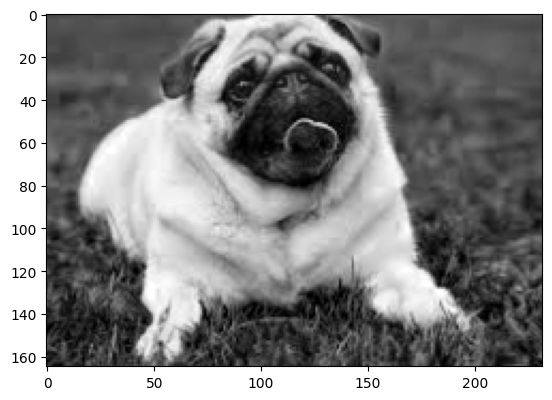

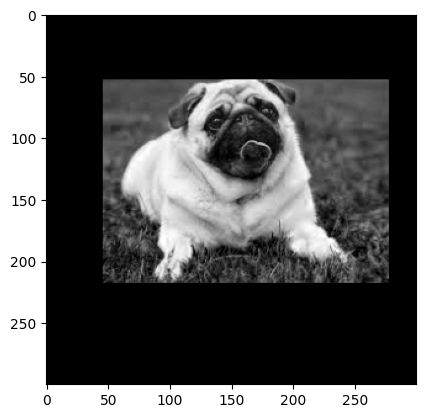

In [15]:
img_path = '/home/anhnx5/work/multi_branch_2d/dog.png'
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
img = cv2.imread(img_path)
img =  img[:,:,0]
def plot_img(img):    
    plt.imshow(img, cmap = 'gray')
    plt.show()
plot_img(img)
train_size = 300 
h, w = img.shape 
if h > train_size or w > train_size:
    pass 
if h < train_size and w < train_size:
    random_pad_left = random.randint(0, train_size - w)
    random_pad_top = random.randint(0, train_size - h)
    # pad in left image     
    img = np.pad(img, ((0,0), (random_pad_left, train_size - w - random_pad_left)), 'constant', constant_values = 0)
    # pad in top image
    img = np.pad(img, ((random_pad_top, train_size - h - random_pad_top), (0,0)), 'constant', constant_values = 0)
    
plot_img(img)

# check distribution value in pickle data


1.2066318472251958


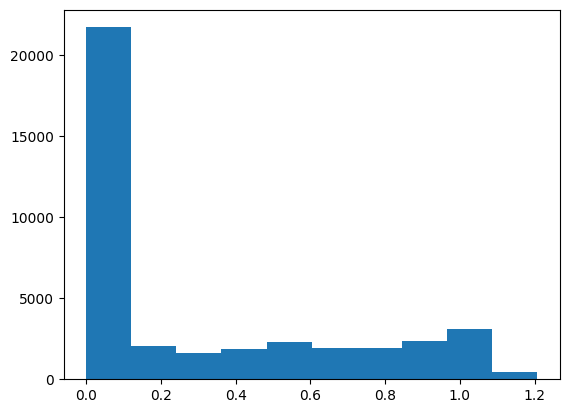

In [10]:
import pickle
import os
import numpy as np
import torch
import torch.utils.data as data
pickle_path = '/home/anhnx5/work/multi_branch_2d/data/sample_dataset/train_2d/slice_1_80.pkl'
data = pickle.load(open(pickle_path, 'rb'))
print(data['t1'].max())

import matplotlib.pyplot as plt
# plot distribution value of data 
def plot_distribution(data):
    plt.hist(data.flatten())
    plt.show()
    
plot_distribution(data['t1'])



 len dataset:  7602
>>>>>>>>>>>>>>>>>>>
data_return:  torch.Size([256, 256])
>>>>>>>>>>>>>>>>>>>
data_return:  torch.Size([256, 256])
>>>>>>>>>>>>>>>>>>>
data_return:  torch.Size([256, 256])
data:  torch.Size([1, 3, 256, 256])
mask:  torch.Size([1, 1, 256, 256])
max_value:  tensor(2.5789, dtype=torch.float64)
min_value:  tensor(0., dtype=torch.float64)
mean_value:  tensor(0.0314, dtype=torch.float64)


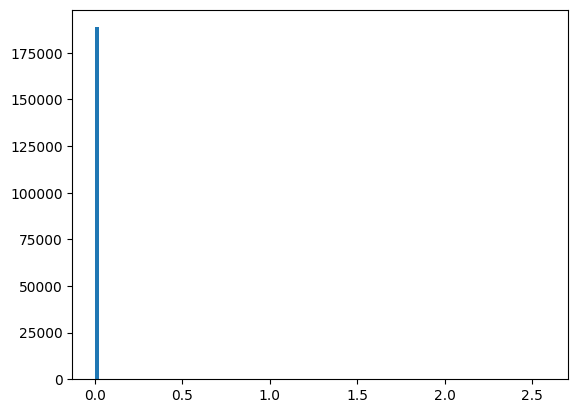

In [8]:
import sys
sys.path.append('/home/anhnx5/work/multi_branch_2d/main')
import matplotlib.pyplot as plt
from main.data_process.ms_2d_dataset import *
import main.config as config
dataset = MS2DDataset(root_dir = config.TRAIN_PATH, type = 'train')
dataloader = DataLoader(dataset, batch_size = 1, shuffle = True, num_workers = 1)
print(' len dataset: ', len(dataset))
for i, data in enumerate(dataloader):
    print('data: ', data['data'].shape)
    print('mask: ', data['mask'].shape)
    ok = data['data']
    max_value = torch.max(ok)
    min_value = torch.min(ok)
    mean_value = torch.mean(ok)
    print('max_value: ', max_value)
    print('min_value: ', min_value)
    print('mean_value: ', mean_value)
    # print('ok =  ', ok)
    # plot distribution value of ok 
    plt.hist(ok.numpy().flatten(), bins = 100)
    plt.show()
    break

In [ ]:

class MSFU_Block(nn.Module):
    '''
    Multi-Scale Feature Up-sampling block
    '''
    def __init__(self, in_filters, out_filters):
        super().__init__()
        # in_filters = in_filters * 3
        # out_filters = out_filters * 3
        print('[INFO] MSFU-Block:------------ ')
        print('------ in_filters: ', in_filters)
        print('------ out_filters: ', out_filters)
        
        
        self.bn1 = nn.BatchNorm2d(in_filters)
        self.conv1 = nn.Conv2d(in_filters, out_filters, kernel_size = 1)
        # 2x2 upsample
        # self.upsample = nn.Upsample(scale_factor = 2, mode = 'bilinear', align_corners = True)
        
        # 2x2 conv2Dtranspose
        self.upsample = nn.ConvTranspose2d(out_filters, out_filters, kernel_size = 2, stride = 2)
        

    def forward(self, x_low, x_high):
        ''' 
        low-resolution input to the MSFU-Block came from the bottom- or another MSFU-Block
        high-resolution came from MMFF-Block
        '''
        print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
        print('[SHAPE] x_low  ==: ', x_low.shape)
        print('[SHAPE] x_high == ', x_high.shape)
        global counter
        counter += 1
        print('[COUNTER]  counter  = ', counter)
        x_low = self.bn1(x_low)
        x_low = self.conv1(x_low)
        x_low = self.upsample(x_low)
        
        print('[SHAPE] x_low after: ', x_low.shape)
        x = torch.cat((x_low, x_high), dim = 1)
        x = self.bn2(x)
        x = self.conv2(x)
        x = self.bn3(x)
        x = self.conv3(x)
        return x
